### Mean absolute error Vs Runtime for 10 data files

In [51]:
import os

data_file = 'Problem1_data_files'

mean_errors = {}
mean_runtimes = {}
mean_error_values = []
mean_runtime_values = []

for N in range(1, 11):
    filename = f'timing{N}.dat' 
    filepath = os.path.join(data_file, filename)
    with open(filepath, 'r') as file:
        for line in file:
            N, error, runtime = map(float, line.split())
            if N not in mean_errors:
                mean_errors[N] = []
                mean_runtimes[N] = []
            mean_errors[N].append(error)
            mean_runtimes[N].append(runtime)

for N, errors in sorted(mean_errors.items()):
    mean_error = sum(errors) / len(errors)
    mean_error_values.append(mean_error)

for N, runtimes in sorted(mean_runtimes.items()):
    mean_runtime = sum(runtimes) / len(runtimes)
    mean_runtime_values.append(mean_runtime)

for N, mean_error, mean_runtime in zip(sorted(mean_errors), mean_error_values, mean_runtime_values):
    print(f'N: {N}\nMean error: {mean_error}\nMean runtime: {mean_runtime}')


N: 100.0
Mean error: 0.2615927
Mean runtime: 0.0
N: 1000.0
Mean error: 0.053592740000000014
Mean runtime: 0.0
N: 10000.0
Mean error: 0.021992740000000004
Mean runtime: 0.001
N: 100000.0
Mean error: 0.0021672590000000004
Mean runtime: 0.009999999999999998
N: 1000000.0
Mean error: 0.0012792589999999998
Mean runtime: 0.034999999999999996
N: 10000000.0
Mean error: 0.0006632590000000001
Mean runtime: 0.33199999999999996
N: 100000000.0
Mean error: 0.00015209899999999997
Mean runtime: 3.3199999999999994
N: 1000000000.0
Mean error: 1.652901e-05
Mean runtime: 34.018
N: 1410065408.0
Mean error: 3.3673699999999996e-05
Mean runtime: 46.977


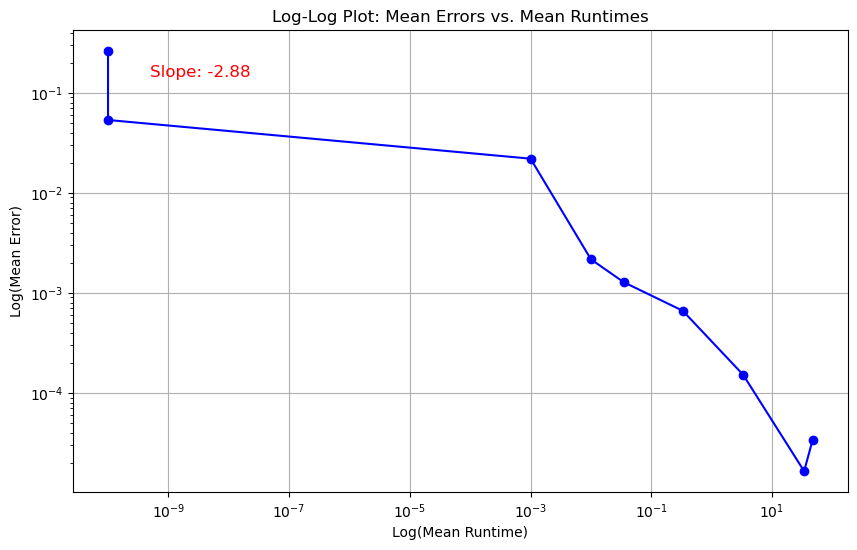

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Replace zero values with a small positive value
mean_runtime_values = [max(1e-10, value) for value in mean_runtime_values]

# Filter out data points with zero mean_error_values
non_zero_indices = np.where(np.array(mean_error_values) > 0)
log_mean_error = np.log(np.array(mean_error_values)[non_zero_indices])
log_mean_runtime = np.log(np.array(mean_runtime_values)[non_zero_indices])

# Check any NaN or Inf values in the arrays
if np.any(np.isnan(log_mean_error)) or np.any(np.isnan(log_mean_runtime)) or \
   np.any(np.isinf(log_mean_error)) or np.any(np.isinf(log_mean_runtime)):
    print("NaN or Inf values found in the data.")
else:
    slope, intercept = np.polyfit(log_mean_error, log_mean_runtime, 1)

    # Create a log-log plot of Mean Runtimes vs. Mean Errors
    plt.figure(figsize=(10, 6))
    plt.loglog(mean_runtime_values, mean_error_values, marker='o', linestyle='-', color='b') 
    plt.title('Log-Log Plot: Mean Errors vs. Mean Runtimes')
    plt.xlabel('Log(Mean Runtime)')
    plt.ylabel('Log(Mean Error)')
    plt.grid(True)
    plt.annotate(f'Slope: {slope:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='r')
    plt.show()

In [53]:
y = [-16, -70030]

for i in y:
    time = abs((i-intercept)/slope)
    print(f"Runtime for 10^{i} is 10^{time}")


Runtime for 10^-16 is 10^2.9857140594861247
Runtime for 10^-70030 is 10^24294.943337990815
